In [1]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from pathlib import Path

# Torch
import torch
from torch.utils.data import Dataset, DataLoader

In [2]:
####################
# Set folder paths #
####################

# Root path
dataset_root = Path('./datasets/appa-real-dataset_v2')

# Labels metadata paths
labels_md_train = dataset_root / 'labels_metadata_train.csv'
labels_md_valid = dataset_root / 'labels_metadata_valid.csv'
labels_md_test = dataset_root / 'labels_metadata_test.csv'

# Dataset paths
dataset_train = dataset_root / 'train_data'
dataset_valid = dataset_root / 'valid_data'
dataset_test = dataset_root / 'test_data'

In [3]:
# Create dataframe for metadata: train, valid, test
df_md_train = pd.read_csv(labels_md_train)
df_md_valid = pd.read_csv(labels_md_valid)
df_md_test = pd.read_csv(labels_md_test)

In [4]:
# Inspect
print("Metadata DataFrames:")
print(f"df_md_train shape: {df_md_train.shape}")
print(f"df_md_valid shape: {df_md_valid.shape}")
print(f"df_md_test shape: {df_md_test.shape}\n")

df_md_train.head()

Metadata DataFrames:
df_md_train shape: (4065, 5)
df_md_valid shape: (1482, 5)
df_md_test shape: (1978, 5)



,imageId,age,gender,ethnicity,emotion
0,1,5.000000,male,caucasian,neutral
1,2,20.079365,female,caucasian,neutral
2,3,76.815789,female,caucasian,slightlyhappy
3,4,55.657895,female,caucasian,happy
4,5,17.666667,female,caucasian,slightlyhappy


In [5]:
# Load raw images to numpy arrays using metadata
def load_images_from_metadata(df_md, dataset_path):
    images = []
    for idx, row in tqdm(df_md.iterrows(), total=len(df_md), desc=f"Loading images for {dataset_path.name}"):
        # Ensure the image name is zero-padded to 6 digits
        img_name = f"{int(row['imageId']):06d}.jpg"
        img_path = dataset_path / img_name
        img = plt.imread(img_path)
        img = img / 255 # Normalize the image to [0, 1] range
        images.append(img)
    return np.array(images,dtype=np.float32)

# Load images from data for X_train, X_valid, X_test as numpy arrays
print("Loading images from metadata...")
X_train = load_images_from_metadata(df_md_train, dataset_train)
X_valid = load_images_from_metadata(df_md_valid, dataset_valid)
X_test = load_images_from_metadata(df_md_test, dataset_test)

Loading images from metadata...


Loading images for test_data: 100%|██████████| 1978/1978 [00:02<00:00, 986.81it/s] 


In [6]:
df_train = pd.DataFrame({'X': list(X_train)})
df_valid = pd.DataFrame({'X': list(X_valid)})
df_test = pd.DataFrame({'X': list(X_test)})

In [7]:
df_train = pd.concat([df_train,df_md_train.reset_index(drop=True)], axis=1)
df_valid = pd.concat([df_valid,df_md_valid.reset_index(drop=True)], axis=1)
df_test = pd.concat([df_test,df_md_test.reset_index(drop=True)], axis=1)

In [8]:
df_train.head()

,X,imageId,age,gender,ethnicity,emotion
0,"[[[0.77254903, 0.5921569, 0.5294118], [0.74117...",1,5.000000,male,caucasian,neutral
1,"[[[0.101960786, 0.03137255, 0.03137255], [0.10...",2,20.079365,female,caucasian,neutral
2,"[[[0.45882353, 0.10980392, 0.13333334], [0.423...",3,76.815789,female,caucasian,slightlyhappy
3,"[[[0.0, 0.0, 0.0], [0.011764706, 0.011764706, ...",4,55.657895,female,caucasian,happy
4,"[[[0.6431373, 0.7254902, 0.80784315], [0.64705...",5,17.666667,female,caucasian,slightlyhappy


In [9]:
df_valid.head()

,X,imageId,age,gender,ethnicity,emotion
0,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",1,26.230769,male,afroamerican,happy
1,"[[[0.0, 0.023529412, 0.015686275], [0.0, 0.019...",2,27.256410,male,caucasian,other
2,"[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",3,23.142857,male,caucasian,slightlyhappy
3,"[[[0.54901963, 0.27058825, 0.2], [0.5647059, 0...",4,73.289474,female,caucasian,happy
4,"[[[0.8392157, 0.8156863, 0.7294118], [0.839215...",5,20.142857,female,caucasian,happy


In [10]:
df_test.head()

,X,imageId,age,gender,ethnicity,emotion
0,"[[[0.019607844, 0.3254902, 0.4117647], [0.0078...",1,23.205128,female,caucasian,neutral
1,"[[[0.08235294, 0.09019608, 0.078431375], [0.08...",2,70.736842,male,asian,slightlyhappy
2,"[[[0.101960786, 0.043137256, 0.015686275], [0....",3,55.368421,male,asian,happy
3,"[[[0.89411765, 0.9137255, 0.8862745], [0.89803...",4,24.277778,male,caucasian,neutral
4,"[[[0.9019608, 0.8784314, 0.83137256], [0.89803...",5,25.230769,female,caucasian,neutral


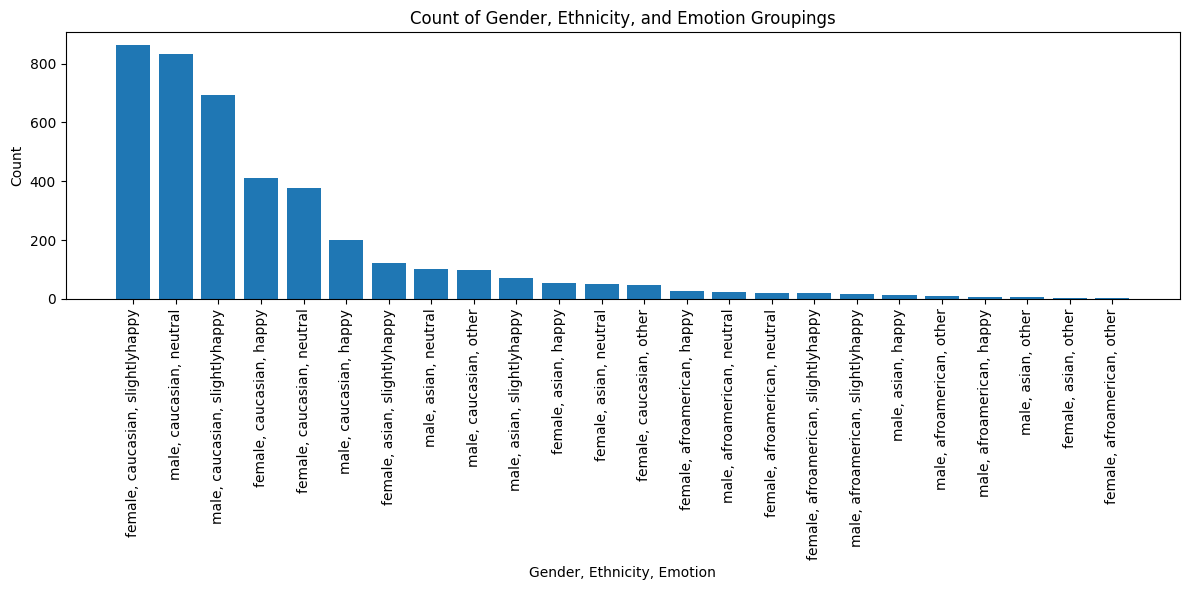

In [49]:
import matplotlib.pyplot as plt

# Group by 'gender', 'ethnicity', and 'emotion' and count occurrences
group_counts = df_train.groupby(['gender', 'ethnicity', 'emotion']).size().reset_index(name='count').sort_values(by='count', ascending=False)

# Plot the counts
plt.figure(figsize=(12, 6))
plt.bar(
    x=range(len(group_counts)), 
    height=group_counts['count'], 
    tick_label=group_counts.apply(lambda row: f"{row['gender']}, {row['ethnicity']}, {row['emotion']}", axis=1)
)

# Add labels and title
plt.xlabel('Gender, Ethnicity, Emotion')
plt.ylabel('Count')
plt.title('Count of Gender, Ethnicity, and Emotion Groupings')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

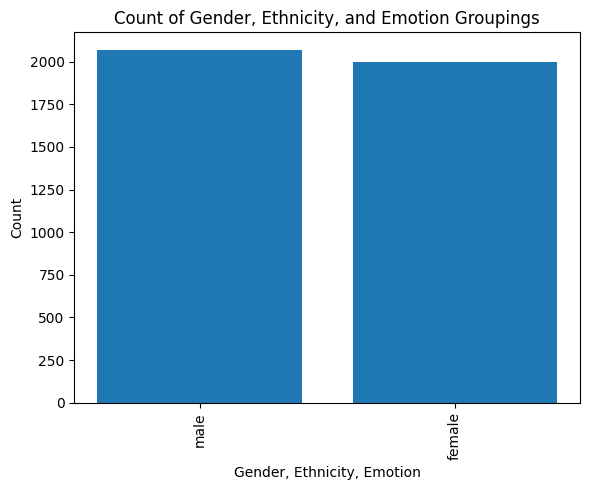

In [57]:
import matplotlib.pyplot as plt

# Group by 'gender' and  count occurrences
group_counts = df_train.groupby(['gender']).size().reset_index(name='count').sort_values(by='count', ascending=False)

# Plot the counts
plt.figure(figsize=(6, 5))
plt.bar(
    x=range(len(group_counts)), 
    height=group_counts['count'], 
    tick_label=group_counts.apply(lambda row: f"{row['gender']}", axis=1)
)

# Add labels and title
plt.xlabel('Gender, Ethnicity, Emotion')
plt.ylabel('Count')
plt.title('Count of Gender, Ethnicity, and Emotion Groupings')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

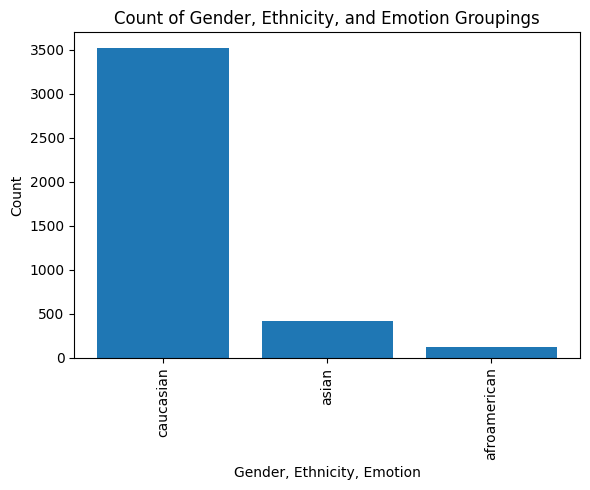

In [58]:
import matplotlib.pyplot as plt

# Group by 'gender', 'ethnicity', and 'emotion' and count occurrences
group_counts = df_train.groupby(['ethnicity']).size().reset_index(name='count').sort_values(by='count', ascending=False)

# Plot the counts
plt.figure(figsize=(6, 5))
plt.bar(
    x=range(len(group_counts)), 
    height=group_counts['count'], 
    tick_label=group_counts.apply(lambda row: f"{row['ethnicity']}", axis=1)
)

# Add labels and title
plt.xlabel('Gender, Ethnicity, Emotion')
plt.ylabel('Count')
plt.title('Count of Gender, Ethnicity, and Emotion Groupings')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

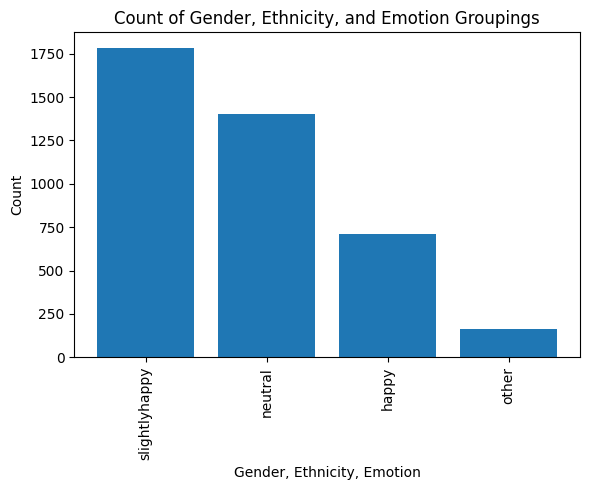

In [59]:
import matplotlib.pyplot as plt

# Group by 'gender', 'ethnicity', and 'emotion' and count occurrences
group_counts = df_train.groupby(['emotion']).size().reset_index(name='count').sort_values(by='count', ascending=False)

# Plot the counts
plt.figure(figsize=(6, 5))
plt.bar(
    x=range(len(group_counts)), 
    height=group_counts['count'], 
    tick_label=group_counts.apply(lambda row: f"{row['emotion']}", axis=1)
)

# Add labels and title
plt.xlabel('Gender, Ethnicity, Emotion')
plt.ylabel('Count')
plt.title('Count of Gender, Ethnicity, and Emotion Groupings')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

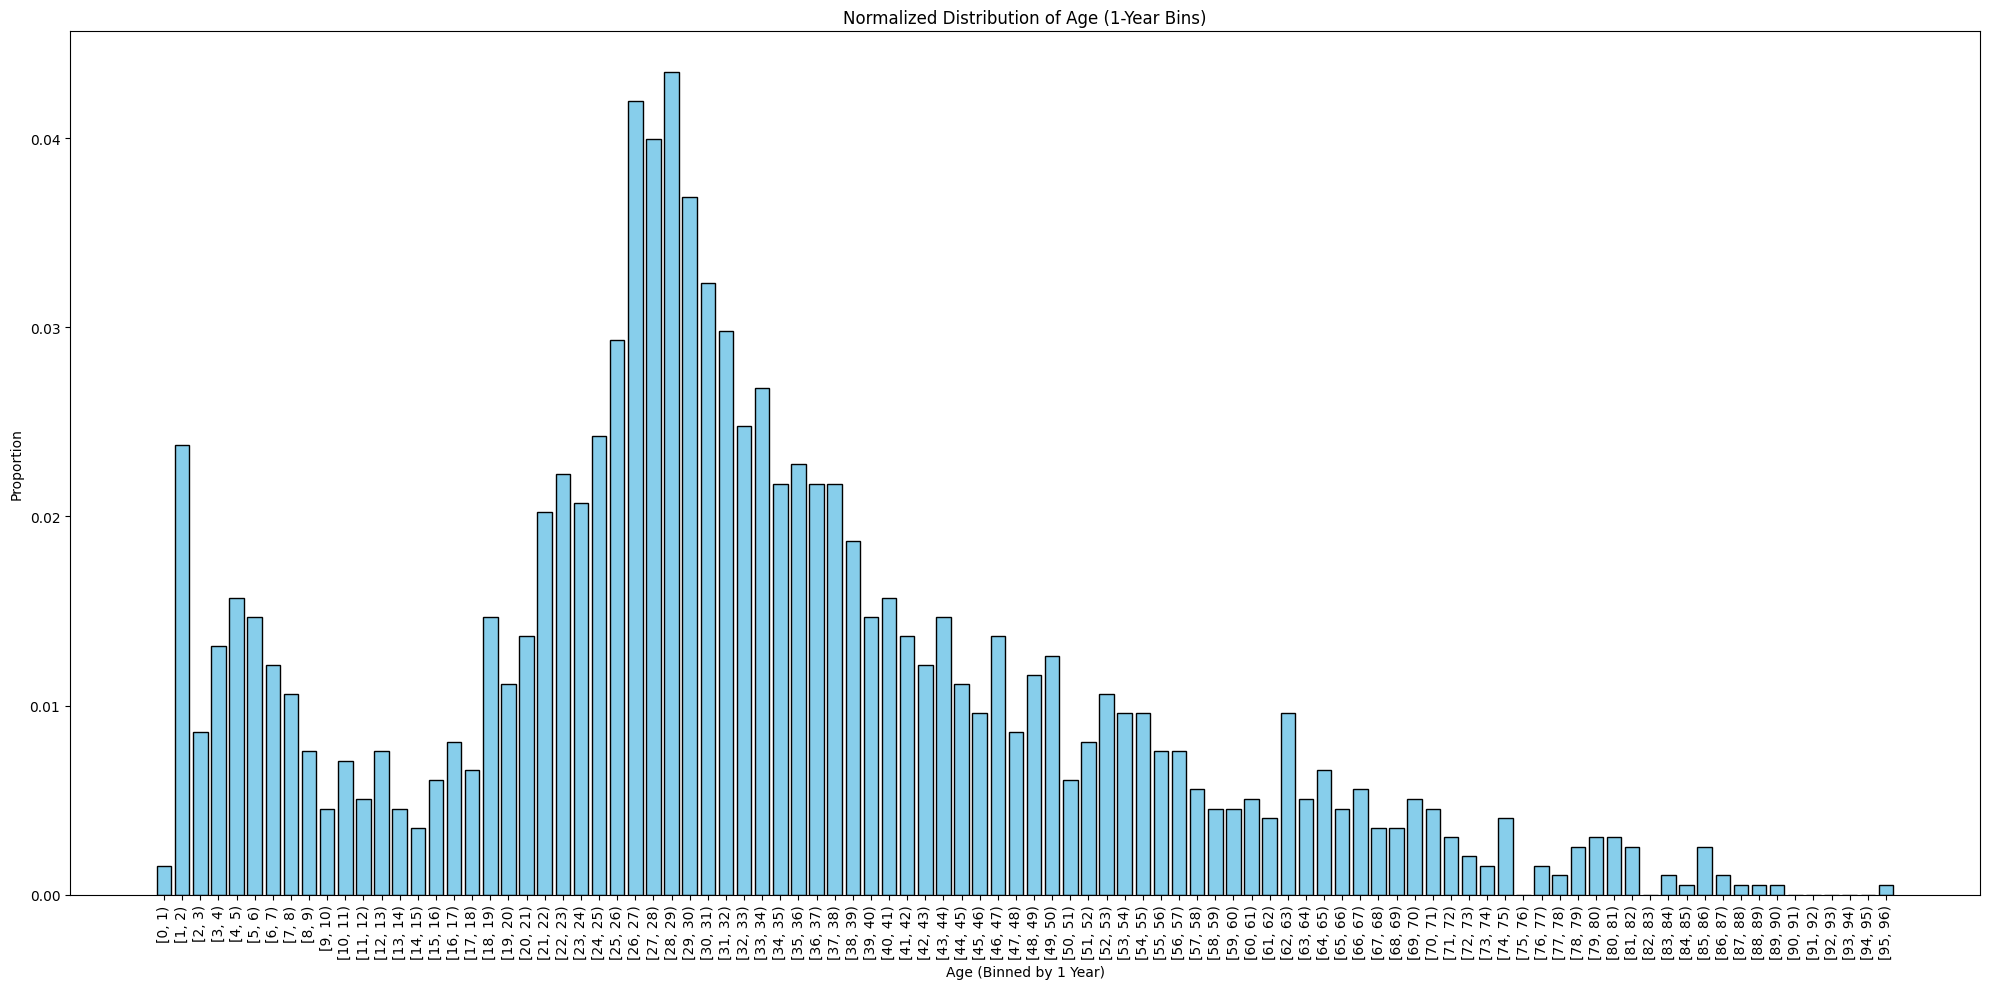

In [67]:
import matplotlib.pyplot as plt

# Bin the 'age' column into 1-year intervals
bins = range(int(df_test['age'].min()), int(df_test['age'].max()) + 2)  # Create bins for each year
df_test['age_binned'] = pd.cut(df_test['age'], bins=bins, right=False)

# Count the occurrences in each bin
age_counts = df_test['age_binned'].value_counts().sort_index()

# Normalize the counts
age_counts_normalized = age_counts / age_counts.sum()

# Plot the normalized binned age counts
plt.figure(figsize=(20, 10))
plt.bar(age_counts_normalized.index.astype(str), age_counts_normalized.values, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Age (Binned by 1 Year)')
plt.ylabel('Proportion')
plt.title('Normalized Distribution of Age (1-Year Bins)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

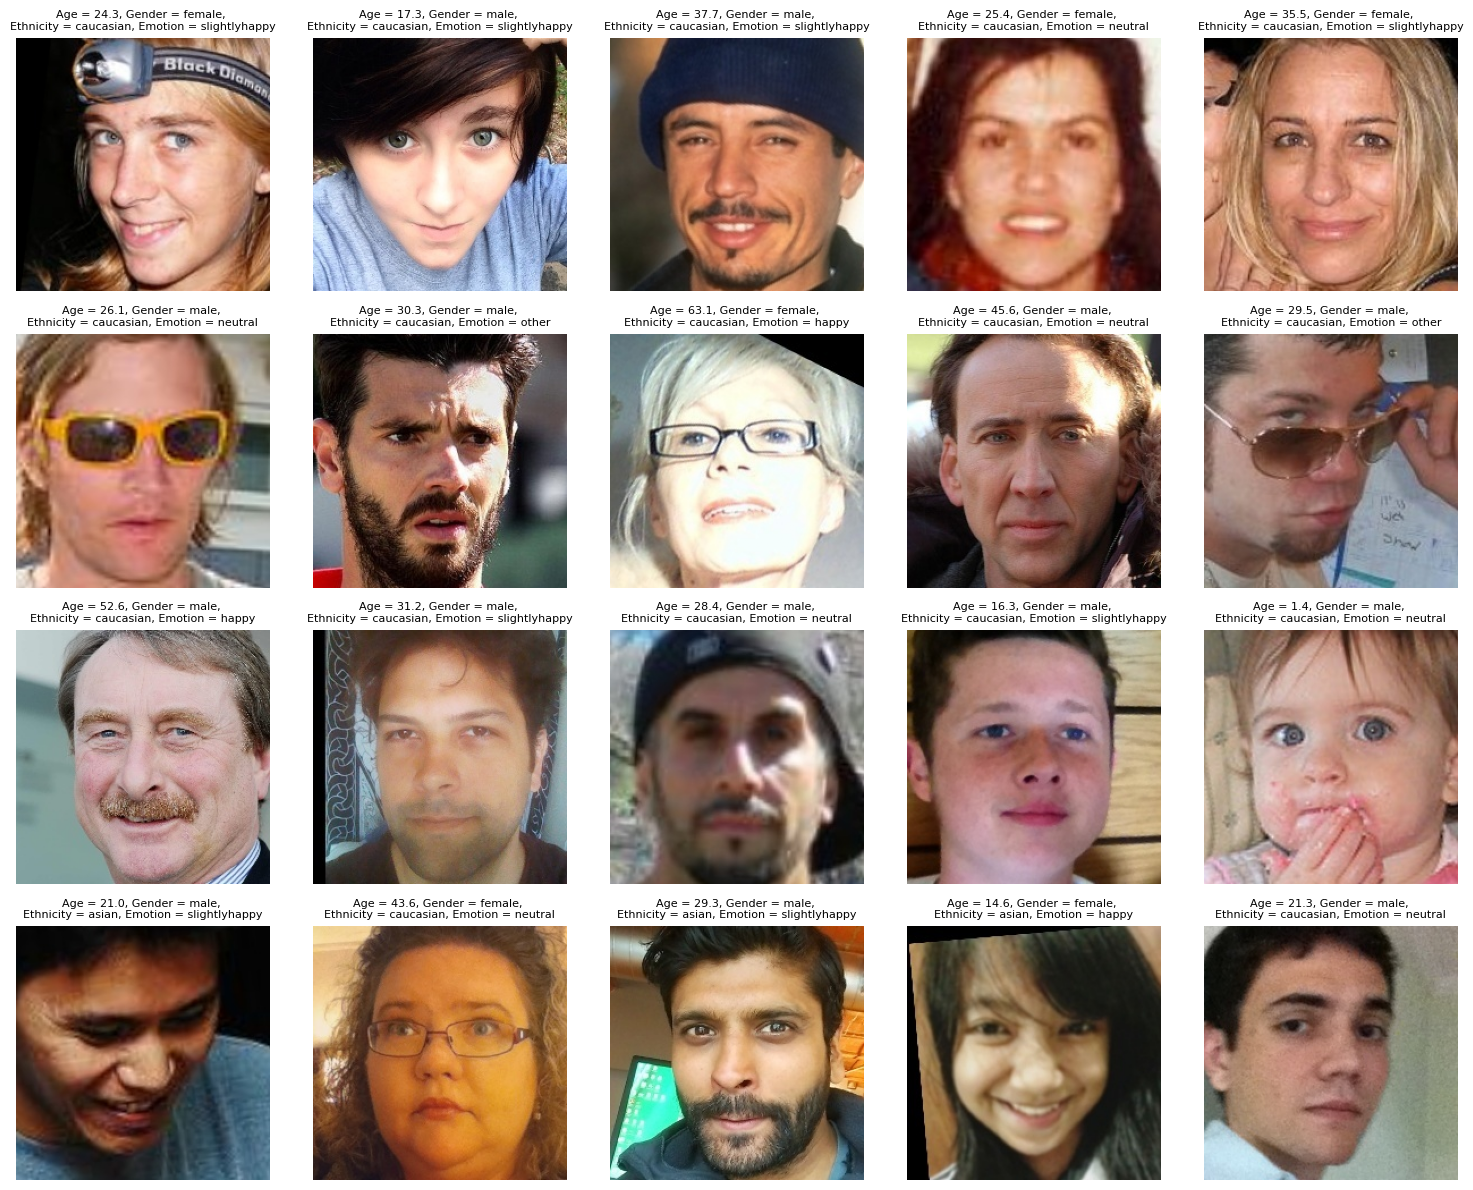

In [124]:
import matplotlib.pyplot as plt
import math
import random

n_plot = 20  # Total number of images to display
images_per_row = 5  # Number of images per row

# Calculate the number of rows needed
n_rows = math.ceil(n_plot / images_per_row)

# Create subplots with the calculated number of rows and columns
fig, axes = plt.subplots(n_rows, images_per_row, figsize=(images_per_row * 3, n_rows * 3))

# Flatten the axes array for easy indexing
axes = axes.flatten()

for i in range(n_plot):
    idx = random.randint(0,len(df_train))
    # ['X', 'imageId', 'age', 'gender', 'ethnicity', 'emotion'] 
    X = df_train.iloc[idx]['X']
    age = df_train.iloc[idx]['age']
    gender = df_train.iloc[idx]['gender']
    ethnicity = df_train.iloc[idx]['ethnicity']
    emotion = df_train.iloc[idx]['emotion']
    
    axes[i].imshow(X)
    axes[i].set_title(f"Age = {age:.1f}, Gender = {gender}, \nEthnicity = {ethnicity}, Emotion = {emotion}",fontsize=8)
    axes[i].axis('off')  # Hide axes for better visualization

# Turn off any unused subplots
for idx in range(n_plot, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()